In [1]:
import gym
import torch
import pandas as pd
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2"   

from elegantrl.run import *
from neo_finrl.ccxt.data_fetch_ccxt import ccxt_fetch_data
from neo_finrl.ccxt.preprocess_ccxt import preprocess_btc

from neo_finrl.ccxt.env_btc_ccxt import BitcoinEnv
from elegantrl.agent import *

In [2]:
# url = 'C:/Users/yosou/Documents/BooksWithCode/Binance/Deep Learning/LSTM_stock_price_predictor-master/btc_create.csv'
# all features
url = 'C:/Users/yosou/Documents/BooksWithCode/Binance/Feature-Selection-for-Machine-Learning-master/Data/merge_augmento_btc.csv'
# url = 'C:/Users/yosou/Documents/BooksWithCode/Binance/Deep Learning/LSTM_stock_price_predictor-master/code/Data/FUTURES/DOGEUSDT/DOGEUSDT-1m-data.csv'

In [3]:
# url = 'C:/Users/yosou/Documents/BooksWithCode/Binance/Deep Learning/LSTM_stock_price_predictor-master/doge_temp.csv'
# df = pd.read_csv(url, parse_dates=True).fillna(value=0)
# df =  df.drop(['Unnamed: 0'], axis=1)
df = pd.read_csv(url, parse_dates=True).fillna(value=0)
df = df[['time','open',
 'high',
 'low',
 'close',
 'volume',
 'twitter_hacks',
 'twitter_pessimistic_doubtful',
 'twitter_banks',
 'twitter_selling',
 'twitter_market_manipulation',
 'twitter_de_centralisation',
 'twitter_angry',
 'twitter_etf',
 'twitter_leverage',
 'twitter_bottom',
 'twitter_institutional_money',
 'twitter_fomo',
 'twitter_prediction',
 'twitter_adoption',
 'twitter_fearful_concerned',
 'twitter_portfolio',
 'twitter_fud_theme',
 'twitter_whitepaper',
 'twitter_announcements',
 'twitter_technical_analysis',
 'twitter_flippening',
 'twitter_community',
 'twitter_investing_trading',
 'twitter_euphoric_excited',
 'twitter_hodling',
 'twitter_ico',
 'twitter_bearish',
 'twitter_going_short',
 'twitter_uncertain',
 'twitter_volume',
 'twitter_risk',
 'twitter_governance',
 'twitter_ban',
 'twitter_cheap',
 'twitter_short_term_trading',
 'twitter_fork',
 'twitter_progress',
 'twitter_shilling',
 'twitter_bullish',
 'twitter_happy',
 'twitter_bubble',
 'twitter_bots',
 'twitter_hopeful',
 'twitter_bug',
 'twitter_open_source',
 'twitter_token_economics',
 'twitter_security',
 'twitter_marketing',
 'twitter_bad_news',
 'twitter_due_diligence',
 'twitter_team',
 'twitter_partnerships',
 'twitter_pump_and_dump',
 'twitter_sad',
 'twitter_panicking',
 'twitter_listing',
 'twitter_regulation_politics',
 'twitter_dip',
 'twitter_launch',
 'twitter_fomo_theme',
 'twitter_advice_support',
 'twitter_rebranding',
 'twitter_wallet',
 'twitter_good_news',
 'twitter_problems_and_issues',
 'twitter_mining',
 'twitter_waiting',
 'twitter_learning',
 'twitter_scaling',
 'twitter_fees',
 'twitter_roadmap',
 'twitter_recovery',
 'twitter_technology',
 'twitter_mistrustful',
 'twitter_marketcap',
 'twitter_positive',
 'twitter_tax',
 'twitter_long_term_investing',
 'twitter_strategy',
 'twitter_competition',
 'twitter_whales',
 'twitter_correction',
 'twitter_stablecoin',
 'twitter_buying',
 'twitter_warning',
 'twitter_annoyed_frustrated',
 'twitter_price',
 'twitter_use_case_applications',
 'twitter_rumor',
 'twitter_scam_fraud',
 'twitter_airdrop',
 'twitter_optimistic',
 'twitter_negative',
 'bitcointalk_hacks',
 'bitcointalk_pessimistic_doubtful',
 'bitcointalk_banks',
 'bitcointalk_selling',
 'bitcointalk_market_manipulation',
 'bitcointalk_de_centralisation',
 'bitcointalk_angry',
 'bitcointalk_etf',
 'bitcointalk_leverage',
 'bitcointalk_bottom',
 'bitcointalk_institutional_money',
 'bitcointalk_fomo',
 'bitcointalk_prediction',
 'bitcointalk_adoption',
 'bitcointalk_fearful_concerned',
 'bitcointalk_portfolio',
 'bitcointalk_fud_theme',
 'bitcointalk_whitepaper',
 'bitcointalk_announcements',
 'bitcointalk_technical_analysis',
 'bitcointalk_flippening',
 'bitcointalk_community',
 'bitcointalk_investing_trading',
 'bitcointalk_euphoric_excited',
 'bitcointalk_hodling',
 'bitcointalk_ico',
 'bitcointalk_bearish',
 'bitcointalk_going_short',
 'bitcointalk_uncertain',
 'bitcointalk_volume',
 'bitcointalk_risk',
 'bitcointalk_governance',
 'bitcointalk_ban',
 'bitcointalk_cheap',
 'bitcointalk_short_term_trading',
 'bitcointalk_fork',
 'bitcointalk_progress',
 'bitcointalk_shilling',
 'bitcointalk_bullish',
 'bitcointalk_happy',
 'bitcointalk_bubble',
 'bitcointalk_bots',
 'bitcointalk_hopeful',
 'bitcointalk_bug',
 'bitcointalk_open_source',
 'bitcointalk_token_economics',
 'bitcointalk_security',
 'bitcointalk_marketing',
 'bitcointalk_bad_news',
 'bitcointalk_due_diligence',
 'bitcointalk_team',
 'bitcointalk_partnerships',
 'bitcointalk_pump_and_dump',
 'bitcointalk_sad',
 'bitcointalk_panicking',
 'bitcointalk_listing',
 'bitcointalk_regulation_politics',
 'bitcointalk_dip',
 'bitcointalk_launch',
 'bitcointalk_fomo_theme',
 'bitcointalk_advice_support',
 'bitcointalk_rebranding',
 'bitcointalk_wallet',
 'bitcointalk_good_news',
 'bitcointalk_problems_and_issues',
 'bitcointalk_mining',
 'bitcointalk_waiting',
 'bitcointalk_learning',
 'bitcointalk_scaling',
 'bitcointalk_fees',
 'bitcointalk_roadmap',
 'bitcointalk_recovery',
 'bitcointalk_technology',
 'bitcointalk_mistrustful',
 'bitcointalk_marketcap',
 'bitcointalk_positive',
 'bitcointalk_tax',
 'bitcointalk_long_term_investing',
 'bitcointalk_strategy',
 'bitcointalk_competition',
 'bitcointalk_whales',
 'bitcointalk_correction',
 'bitcointalk_stablecoin',
 'bitcointalk_buying',
 'bitcointalk_warning',
 'bitcointalk_annoyed_frustrated',
 'bitcointalk_price',
 'bitcointalk_use_case_applications',
 'bitcointalk_rumor',
 'bitcointalk_scam_fraud',
 'bitcointalk_airdrop',
 'bitcointalk_optimistic',
 'bitcointalk_negative',
 'reddit_hacks',
 'reddit_pessimistic_doubtful',
 'reddit_banks',
 'reddit_selling',
 'reddit_market_manipulation',
 'reddit_de_centralisation',
 'reddit_angry',
 'reddit_etf',
 'reddit_leverage',
 'reddit_bottom',
 'reddit_institutional_money',
 'reddit_fomo',
 'reddit_prediction',
 'reddit_adoption',
 'reddit_fearful_concerned',
 'reddit_portfolio',
 'reddit_fud_theme',
 'reddit_whitepaper',
 'reddit_announcements',
 'reddit_technical_analysis',
 'reddit_flippening',
 'reddit_community',
 'reddit_investing_trading',
 'reddit_euphoric_excited',
 'reddit_hodling',
 'reddit_ico',
 'reddit_bearish',
 'reddit_going_short',
 'reddit_uncertain',
 'reddit_volume',
 'reddit_risk',
 'reddit_governance',
 'reddit_ban',
 'reddit_cheap',
 'reddit_short_term_trading',
 'reddit_fork',
 'reddit_progress',
 'reddit_shilling',
 'reddit_bullish',
 'reddit_happy',
 'reddit_bubble',
 'reddit_bots',
 'reddit_hopeful',
 'reddit_bug',
 'reddit_open_source',
 'reddit_token_economics',
 'reddit_security',
 'reddit_marketing',
 'reddit_bad_news',
 'reddit_due_diligence',
 'reddit_team',
 'reddit_partnerships',
 'reddit_pump_and_dump',
 'reddit_sad',
 'reddit_panicking',
 'reddit_listing',
 'reddit_regulation_politics',
 'reddit_dip',
 'reddit_launch',
 'reddit_fomo_theme',
 'reddit_advice_support',
 'reddit_rebranding',
 'reddit_wallet',
 'reddit_good_news',
 'reddit_problems_and_issues',
 'reddit_mining',
 'reddit_waiting',
 'reddit_learning',
 'reddit_scaling',
 'reddit_fees',
 'reddit_roadmap',
 'reddit_recovery',
 'reddit_technology',
 'reddit_mistrustful',
 'reddit_marketcap',
 'reddit_positive',
 'reddit_tax',
 'reddit_long_term_investing',
 'reddit_strategy',
 'reddit_competition',
 'reddit_whales',
 'reddit_correction',
 'reddit_stablecoin',
 'reddit_buying',
 'reddit_warning',
 'reddit_annoyed_frustrated',
 'reddit_price',
 'reddit_use_case_applications',
 'reddit_rumor',
 'reddit_scam_fraud',
 'reddit_airdrop',
 'reddit_optimistic',
 'reddit_negative',
         'close_d',
 'r']]

In [4]:
'''data_fetch'''
# df = ccxt_fetch_data(start = '20200602 00:00:00', end = '20210609 00:00:00',
#                     pair = 'DOGE/USDT', period = '1m')
# df = ccxt_fetch_data(start = '20210101 00:00:00', end = '20210107 00:00:00',
#                     pair = 'BTC/USDT', period = '1m')

'data_fetch'

In [5]:
# df = df[362360:]
df

,time,open,high,low,close,volume,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,...,reddit_annoyed_frustrated,reddit_price,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative,close_d,r
0,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,0.0,0.0,1.0,1.0,...,0.0,17.0,3.0,0.0,0.0,0.0,7.0,31.0,4349.99,0.002090
1,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,0.0,1.0,1.0,4.0,...,1.0,24.0,10.0,0.0,0.0,0.0,7.0,35.0,4360.69,0.005912
2,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,0.0,0.0,1.0,0.0,...,0.0,24.0,7.0,0.0,0.0,0.0,9.0,36.0,4444.00,0.002457
3,2017-08-17 09:00:00,4360.00,4445.78,4360.00,4444.00,10.763623,0.0,0.0,2.0,0.0,...,1.0,39.0,10.0,1.0,2.0,1.0,9.0,37.0,4460.00,0.018925
4,2017-08-17 10:00:00,4441.10,4470.00,4399.81,4460.00,24.865399,0.0,0.0,3.0,1.0,...,0.0,32.0,9.0,0.0,0.0,0.0,5.0,29.0,4427.30,0.003594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32051,2021-04-20 12:00:00,56266.83,56290.31,55604.73,55801.14,2705.944348,0.0,0.0,0.0,4.0,...,1.0,77.0,24.0,2.0,5.0,0.0,26.0,100.0,56317.99,-0.008311
32052,2021-04-20 13:00:00,55801.13,56320.55,55693.69,56317.99,2723.866998,0.0,0.0,2.0,2.0,...,1.0,81.0,26.0,1.0,4.0,0.0,22.0,93.0,55336.14,0.009220
32053,2021-04-20 14:00:00,56318.00,56455.93,55200.00,55336.14,4285.544393,0.0,0.0,3.0,4.0,...,1.0,99.0,27.0,0.0,6.0,0.0,29.0,113.0,55323.19,-0.017588
32054,2021-04-20 15:00:00,55336.14,55567.87,54649.58,55323.19,3870.663360,0.0,0.0,0.0,5.0,...,1.0,105.0,27.0,2.0,5.0,0.0,27.0,121.0,55784.86,-0.000234


In [6]:
dff = df.set_index('time')
data_ary = preprocess_btc(dff)

                        open     high      low    close     volume  \
time                                                                 
2017-08-17 06:00:00  4330.29  4345.45  4309.37  4324.35   7.229691   
2017-08-17 07:00:00  4316.62  4349.99  4287.41  4349.99   4.443249   
2017-08-17 08:00:00  4333.32  4377.85  4333.32  4360.69   0.972807   
2017-08-17 09:00:00  4360.00  4445.78  4360.00  4444.00  10.763623   
2017-08-17 10:00:00  4441.10  4470.00  4399.81  4460.00  24.865399   

                     twitter_hacks  twitter_pessimistic_doubtful  \
time                                                               
2017-08-17 06:00:00            0.0                           0.0   
2017-08-17 07:00:00            0.0                           1.0   
2017-08-17 08:00:00            0.0                           0.0   
2017-08-17 09:00:00            0.0                           0.0   
2017-08-17 10:00:00            0.0                           0.0   

                     twitter_ban

In [7]:
# data_ary = preprocess_btc(df)

In [8]:
data_ary.shape

(32056, 286)

In [9]:
gpu_id = 0
args = Arguments(agent=None, env=None, gpu_id=gpu_id)
args.agent = AgentDQN()

In [10]:
'''choose environment'''
args.env = BitcoinEnv(processed_ary = data_ary, if_train=True, if_test=False)
args.env_eval = BitcoinEnv(processed_ary = data_ary, if_train=False, if_test=False)
args.net_dim = 2 ** 9 # change a default hyper-parameters
args.batch_size = 2 ** 8

In [11]:
train_and_evaluate(args)

| GPU id: 0, cwd: ./AgentDQN/BitcoinEnv_0
| Remove history
ID      Step      MaxR |    avgR      stdR       objA      objC |  avgS  stdS
0   1.02e+03      0.69 |
0   1.02e+03      0.69 |    0.69      0.00       0.06      0.00 |  4808     0
0   2.05e+03    858.49 |
ID      Step   TargetR |    avgR      stdR   UsedTime  ########
0   2.05e+03     14.80 |  858.49      0.00         86  ########
0   2.05e+03    858.49 |  858.49      0.00       0.27      0.00 |  4808     0
| SavedDir: ./AgentDQN/BitcoinEnv_0
| UsedTime: 87


In [12]:
args = Arguments(agent=None, env=None, gpu_id=gpu_id)
args.agent = AgentDQN()
args.env = BitcoinEnv(processed_ary = data_ary, if_train=False, if_test=True)
args.net_dim = 2 ** 9 # change a default hyper-parameters
args.batch_size = 2 ** 8
args.if_remove = False
args.cwd = './AgentDQN/BitcoinEnv_'+str(gpu_id)
args.init_before_training()

| GPU id: 0, cwd: ./AgentDQN/BitcoinEnv_0


In [13]:
prediction = args.env.trade_prediction(args, torch, df)

Loaded act: ./AgentDQN/BitcoinEnv_0
1602
1601
['2021-02-12 21:00:00' '2021-02-12 22:00:00' '2021-02-12 23:00:00' ...
 '2021-04-20 14:00:00' '2021-04-20 15:00:00' '2021-04-20 16:00:00']


ValueError: arrays must all be same length

In [ ]:
args.env.backtest_plot(prediction, df)

FileNotFound when load_model: None
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State

State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)
State 1..... (288,)
State 2..... (288,)


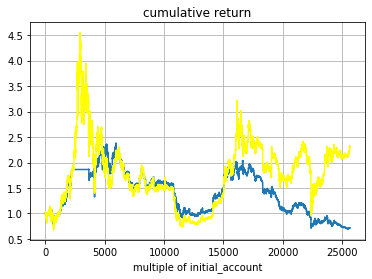

FileNotFoundError: [Errno 2] No such file or directory: 'None/cumulative_return.jpg'

<Figure size 432x288 with 0 Axes>

In [11]:
# Draw the graph
import matplotlib.pyplot as plt
%matplotlib inline

BitcoinEnv(processed_ary = data_ary, if_train=False, if_test=True)\
.draw_cumulative_return(self = args.env, args = args, _torch = torch)